In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

from rur import uri, uhmi

# 1. Preparation

In [2]:
Repository = "/storage7/NewCluster" # Where NC data is stored
snap = uri.RamsesSnapshot(Repository, 0, z=0.8)
snaps = uri.TimeSeries(snap)

gals = uhmi.HaloMaker.load(snap, galaxy=True, extend=True)
print(f"{len(gals)} galaxies found")
print(gals.dtype.names)
print()
hals = uhmi.HaloMaker.load(snap, galaxy=False, extend=True)
print(f"{len(hals)} halos found")
print(hals.dtype.names)
print()

Find nearest iout=620 for z=0.8
[Output 00620] Age (Gyr) : 6.883 / 13.761, z = 0.80011 (a = 0.5555)
5570 galaxies found
('nparts', 'id', 'timestep', 'level', 'host', 'hostsub', 'nbsub', 'nextsub', 'aexp', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'r', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'sigma', 'sigma_bulge', 'm_bulge', 'rvir', 'mvir', 'tvir', 'cvel', 'rho0', 'rc', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'r50', 'r90', 'r50u', 'r50g', 'r50r', 'r50i', 'r50z', 'r90u', 'r90g', 'r90r', 'r90i', 'r90z', 'SFR', 'SFR_r50', 'SFR_r90', 'SFR10', 'SFR10_r50', 'SFR10_r90', 'age', 'ageu', 'ageg', 'ager', 'agei', 'agez', 'vsig', 'vsig_r50', 'vsig_r90', 'metal', 'vsig_gas', 'metal_gas', 'vsig_gas_r50', 'vsig_gas_r90', 'M_gas', 'M_gas_r50', 'M_gas_r90', 'Mcold_gas', 'Mcold_gas_r50', 'Mcold_gas_r90', 'Mdense_gas', 'Mdense_gas_r50', 'Mdense_gas_r90', 'H_gas', 'O_gas', 'Fe_gas', 'Mg_gas', 'C_gas', 'N_gas', 'Si_gas', 'S_gas', 'D_gas', 'CDustSmall_gas', 'CDustLarge_gas', 'SiDustSmall_gas'

# 2. Select region

In [3]:
target = gals[23]

# Set box 3*R50 of the target galaxy
snap.set_box_halo(target, radius=3, radius_name='r50')
print(snap.box)

[[0.48273045 0.48299583]
 [0.5293827  0.52964809]
 [0.54794467 0.54821005]]


# 3. Particle

## I. Introduction

### Dark Matter (family=1)
The dark matter in NC is treated as a cold dark matter (CDM).

The gravitation is the one and only source dertermine the movement of the DM particles.



The mass of the DM particle ($M_{DM}\, \sim\, 10^6\ \rm M_{\odot}$) inside the target zoom-in region is larger than the stellar particles ($M_{*}\, \sim\, 2\times 10^4\ \rm M_{\odot}$)




### Star (family=2)
data dype:

- 'x', 'y', 'z' : position
- 'vx', 'vy', 'vz' : position
- 'm' : current mass
- 'm0' : initial mass
- 'rho0' : background gas density at birth position
- 'epoch' : related to birth time (you can directly use 'age')
- 'metal' : total metal fraction
- 'H' ~ 'D' : element abundance

- 'id' : identifier number
- 'family' : particle type indicator

### SMBH (family=3)

### Tracer (family: cloud=-3, star=-2, gas=0)

## II. Load Particle

In [11]:
snap.get_part(nthread=10)
star = snap.part['star']; print(len(star))
dm = snap.part['dm']; print(len(dm))

8774769
178800


In [12]:
familys, counts = np.unique(snap.part['family'], return_counts=True)
for family, count in zip(familys, counts):
    print(family, count)

-3 108024
-2 239592
0 59576
1 178800
2 8774769
3 5174


In [9]:
print(star.dtype.names)

('x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'id', 'level', 'family', 'tag', 'epoch', 'metal', 'm0', 'H', 'O', 'Fe', 'Mg', 'C', 'N', 'Si', 'S', 'D', 'rho0', 'partp', 'cpu')


### Faster Loading

In [13]:
# Specify `pname` if you need only one family
# >>> snap.get_part(pname='star', nthread=10)

# Specify `target_fields` if you need only specific fields
# >>> snap.get_part(target_fields=['x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'id'], nthread=10)

## III. Draw particles

Computing particle map of 8774769 particles... 
Done (0.823s).
Computing particle map of 178800 particles... 
Done (0.020s).


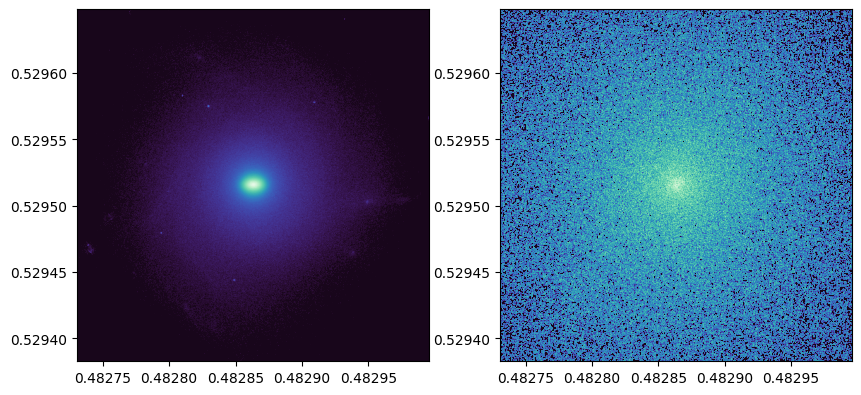

In [8]:
from rur import painter

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
painter.draw_partmap(star, box=snap.box, ax=axes[0])
painter.draw_partmap(dm, box=snap.box, ax=axes[1])
plt.show(); plt.close()

# 4. AMR/Cell

## I. Introduction

data dype:

('x', 'y', 'z', 'rho', 'vx', 'vy', 'vz', 'P', 'metal', 'H', 'O', 'Fe', 'Mg', 'C', 'N', 'Si', 'S', 'D', 'd1', 'd2', 'd3', 'd4', 'refmask', 'sigma', 'level', 'cpu')

- 'x', 'y', 'z' : position
- 'vx', 'vy', 'vz' : position
- 'm' : mass
- 'level' : AMR level
- 'rho' : mass density
- 'P' : pressure
- 'T' : temperature
- 'metal' : total metal fraction
- 'H' ~ 'D' : element abundance
- 'd1' : fraction of small Carbonaceous dust (a = 0.005 micron)
- 'd2' : fraction of small Carbonaceous dust (a = 0.1 micron)
- 'd3' : Silicon fraction of small Silicate dust (a = 0.005 micron)
- 'd4' : Silicon fraction of small Silicate dust (a = 0.1 micron)
- 'sigma' : internal gas velocity dispersion

** For silicate dust (d3, d4), you should divide 0.163 (the mass fraction of Si in the Silicate dust) to get the Silicate dust fraction

## II. Load Cell

In [15]:
cell = snap.get_cell(nthread=10); print(len(cell))
print(cell.dtype.names)

811898
('x', 'y', 'z', 'rho', 'vx', 'vy', 'vz', 'P', 'metal', 'H', 'O', 'Fe', 'Mg', 'C', 'N', 'Si', 'S', 'D', 'd1', 'd2', 'd3', 'd4', 'refmask', 'sigma', 'level', 'cpu')


## III. Draw cells

MinLvl = 17, MaxLvl = 20, Initial Image Size:  [288 288]
Drawing gas map... 


/home/jeon/rur/rur/painter.py:307: RuntimeWarning: invalid value encountered in multiply
  image[mask_active] = (np.divide(image * depth_map + hist_map * add_depth, depth_map_new,


Done (0.211s).
MinLvl = 17, MaxLvl = 20, Initial Image Size:  [288 288]
Drawing gas map... 
Done (0.213s).
MinLvl = 17, MaxLvl = 20, Initial Image Size:  [288 288]
Drawing Refinement Level Map... 
17
18
19
20
Done (0.199s).
Cropped Image Size:  (288, 288)
MinLvl = 17, MaxLvl = 20, Initial Image Size:  [288 288]
Drawing gas map... 
Done (0.215s).


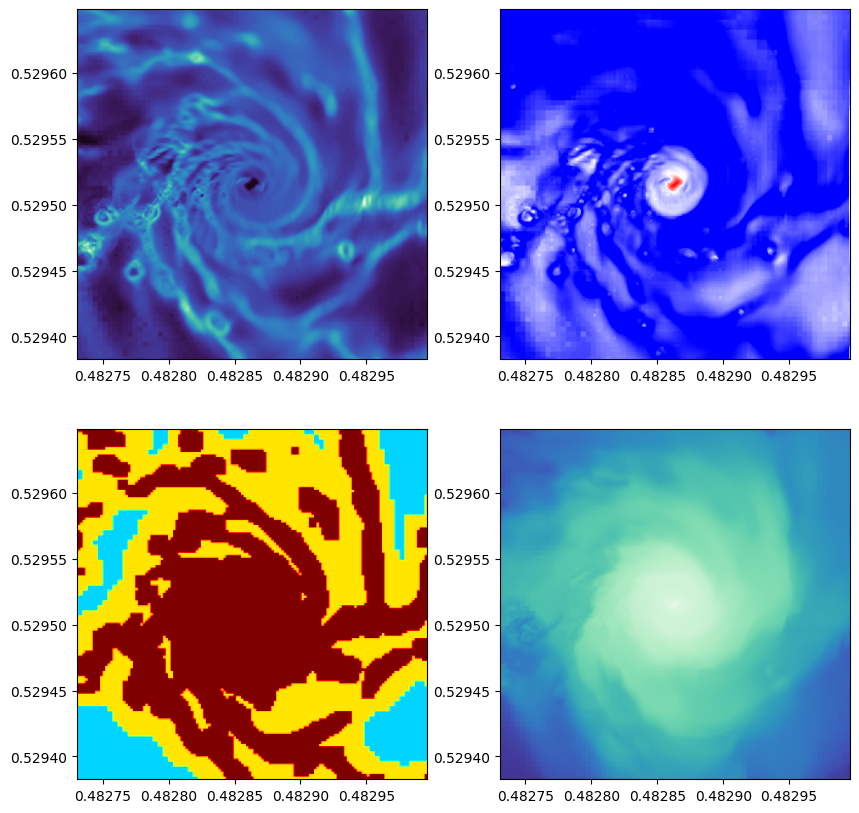

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
painter.draw_gasmap(cell, box=snap.box, ax=axes[0,0]) # Density map
painter.draw_gasmap(cell, box=snap.box, ax=axes[0,1], mode='T', cmap=plt.cm.bwr) # Temperature map
painter.draw_lvlmap(cell, box=snap.box, ax=axes[1,0], cmap=plt.cm.jet, minlvl=17, maxlvl=20) # Grid map
painter.draw_gasmap(cell, box=snap.box, ax=axes[1,1], mode='metal', qscale=0.5) # Metal map
plt.show(); plt.close()